# Importing Necessary Libraries

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")


!pip install mediapipe
# Clean up the notebook
clean_notebook()



Notebook cleaned.


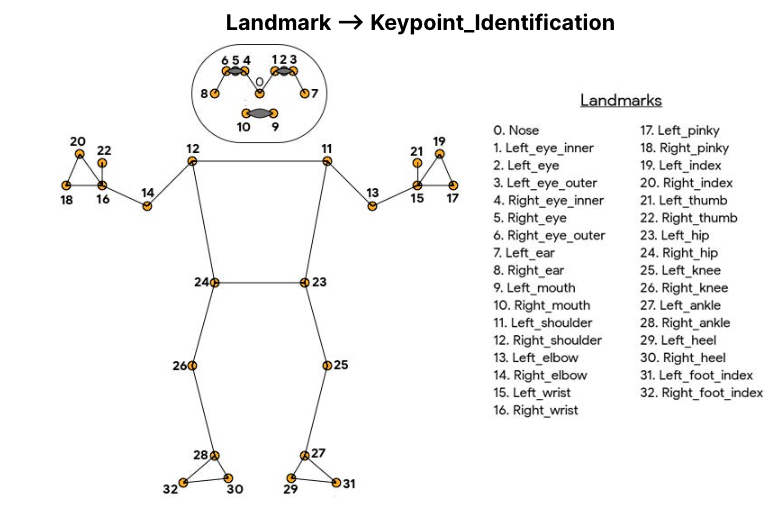

In [2]:
import cv2
import mediapipe as mp
import pandas as pd
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False)
mp_drawing = mp.solutions.drawing_utils

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732856197.526243    8531 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732856197.612319    8541 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732856197.731116    8561 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


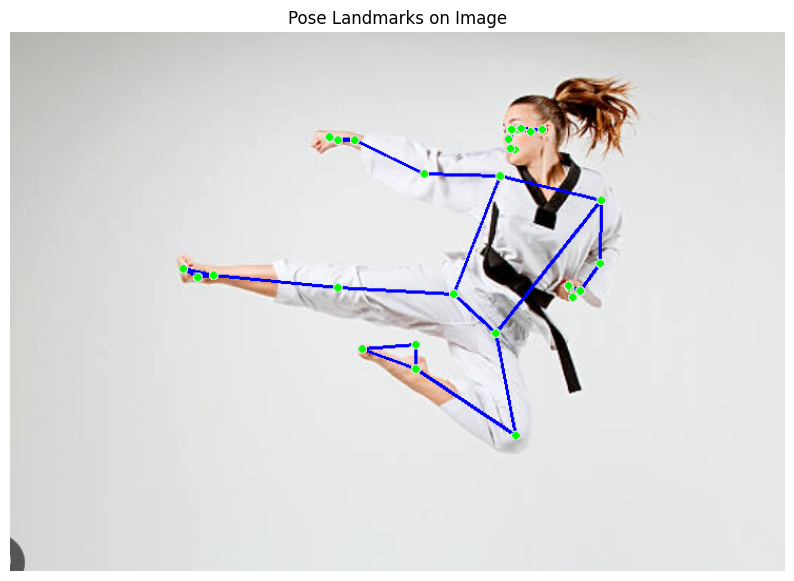

In [3]:

image_path = "./Karate00.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect pose landmarks
results = pose.process(image_rgb)

# Check if landmarks are detected
if results.pose_landmarks:
    # Draw pose landmarks on the image
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
    )

    # Convert BGR to RGB for Matplotlib
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Plot the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_image_rgb)
    plt.title("Pose Landmarks on Image")
    plt.axis("off")  # Hide axis for better visualization
    plt.show()


In [4]:
import cv2
import mediapipe as mp
import pandas as pd
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose    = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False)



# Load image
image_path = "./Karate00.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect pose landmarks
results = pose.process(image_rgb)

pose.close()

W0000 00:00:1732856198.007654    8851 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732856198.109819    8871 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


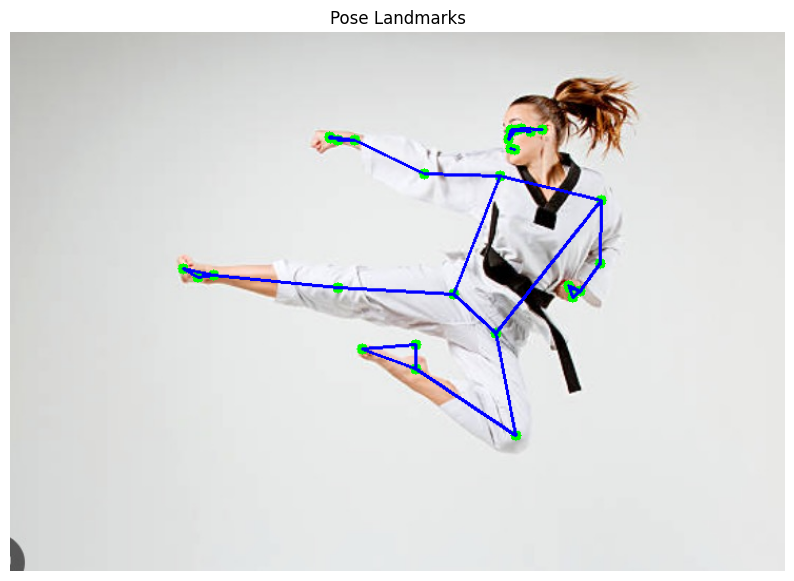

In [5]:

# Check if landmarks are detected
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    height, width, _ = image.shape
    
    # Draw landmarks using OpenCV
    for idx, landmark in enumerate(landmarks):
        x = int(landmark.x * width)
        y = int(landmark.y * height)
        
        # Draw circles for each landmark
        cv2.circle(image, (x, y), radius=5, color=(0, 255, 0), thickness=-1)
    
    # Draw connections (pose connections)
    pose_connections = mp_pose.POSE_CONNECTIONS
    for connection in pose_connections:
        start_idx, end_idx = connection
        start_point = results.pose_landmarks.landmark[start_idx]
        end_point = results.pose_landmarks.landmark[end_idx]
        
        start_x, start_y = int(start_point.x * width), int(start_point.y * height)
        end_x, end_y = int(end_point.x * width), int(end_point.y * height)
        
        # Draw lines between connected landmarks
        cv2.line(image, (start_x, start_y), (end_x, end_y), color=(255, 0, 0), thickness=2)

    
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title("Pose Landmarks")
    plt.axis("off")
    plt.show()


In [6]:

    # Extract landmarks and save to DataFrame
    data = {
        "id": [],
        "x": [],
        "y": [],
        "z": [],
        "visibility": [],
    }
    
    for idx, landmark in enumerate(landmarks):
        data["id"].append(idx)
        data["x"].append(landmark.x)
        data["y"].append(landmark.y)
        data["z"].append(landmark.z)
        data["visibility"].append(landmark.visibility)
    
    # Convert to Pandas DataFrame
    df = pd.DataFrame(data)
    df
   

,id,x,y,z,visibility
0,0,0.643832,0.200307,-0.203668,0.999991
1,1,0.651376,0.184238,-0.212227,0.999974
2,2,0.655161,0.182970,-0.212461,0.999977
3,3,0.659791,0.181597,-0.212380,0.999977
4,4,0.646707,0.184263,-0.186569,0.999982
5,5,0.647236,0.183932,-0.186986,0.999990
6,6,0.647950,0.183370,-0.187142,0.999988
7,7,0.686502,0.182202,-0.185902,0.999997
8,8,0.671991,0.185563,-0.061851,0.999991
9,9,0.651817,0.219126,-0.186666,0.999998
